In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from swing3dify.calibration_data import KNOWN_CALIBRATION_DATA
from swing3dify.config import ALL_KEYPOINTS, CONF_THR
from swing3dify.time_adjustment import calculate_delay_frame
from swing3dify.utils import compute_camera_parameters, reconstruct_3D, rescale_data

In [2]:
# club1 = pd.read_csv('../data/sample_video1/club/position_data.csv')
# club2 = pd.read_csv('../data/sample_video2/club/position_data.csv')
# conf1 = pd.read_csv('../data/sample_video1/club/confidence_data.csv')
# conf2 = pd.read_csv('../data/sample_video2/club/confidence_data.csv')

club1 = pd.read_csv('../data/club/data/red_0712_0016/position_data.csv')
club2 = pd.read_csv('../data/club/data/white_0712_0016/position_data.csv')
conf1 = pd.read_csv('../data/club/data/red_0712_0016/confidence_data.csv')
conf2 = pd.read_csv('../data/club/data/white_0712_0016/confidence_data.csv')

In [3]:
club1.interpolate(method="linear", both=True, inplace=True)
club2.interpolate(method="linear", both=True, inplace=True)

In [4]:
img_width, img_height = 1080, 1920

In [5]:
club1.interpolate(method="linear", both=True, inplace=True)
club2.interpolate(method="linear", both=True, inplace=True)

delay_frame = calculate_delay_frame(club1, club2, "HOSEL")

new_club1 = club1.copy()
new_club2 = club2.copy()

In [6]:
print(delay_frame)

-32


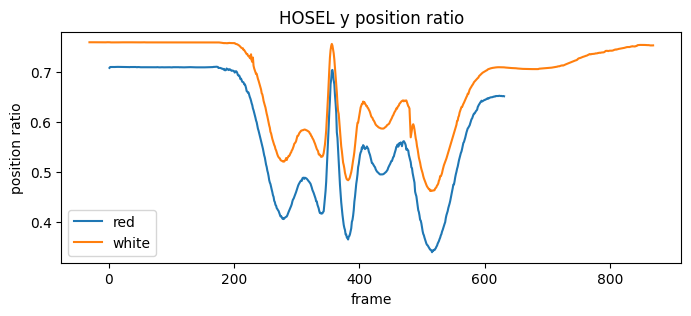

In [7]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(club1['frame'], club1['HOSEL_y'], label='red')
ax.plot(club2['frame'] + delay_frame, club2['HOSEL_y'], label='white')
ax.legend()
ax.set_title('HOSEL y position ratio')
ax.set_xlabel('frame')
ax.set_ylabel('position ratio')
plt.show()

In [8]:
new_club1 = club1.copy()
new_club2 = club2.copy()

for c in new_club1.columns:
    if c.endswith("_x") or c.endswith("_y"):
        new_club1.loc[conf1["BOX_conf"] <= CONF_THR, c] = None
        new_club2.loc[conf2["BOX_conf"] <= CONF_THR, c] = None

new_club1["new_frame"] = new_club1["frame"]
new_club2["new_frame"] = new_club2["frame"] + delay_frame

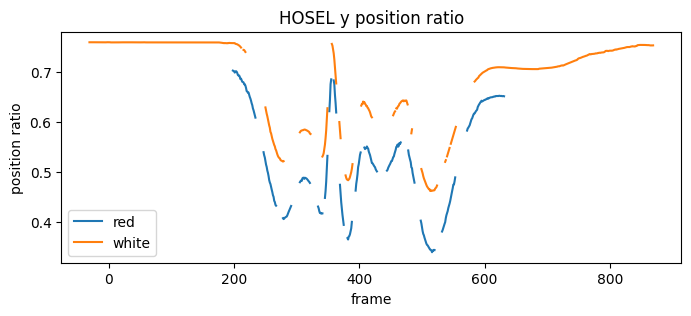

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(new_club1['new_frame'], new_club1['HOSEL_y'], label='red')
ax.plot(new_club2['new_frame'], new_club2['HOSEL_y'], label='white')
ax.legend()
ax.set_title('HOSEL y position ratio')
ax.set_xlabel('frame')
ax.set_ylabel('position ratio')
plt.show()

In [10]:
new_club1 = rescale_data(new_club1, img_width, img_height)
new_club2 = rescale_data(new_club2, img_width, img_height)

index1 = set(
    new_club1[~new_club1.isnull().any(axis=1)]["new_frame"].values
)
index2 = set(
    new_club2[~new_club2.isnull().any(axis=1)]["new_frame"].values
)

common_index = np.array(sorted(list(index1 & index2)))
print(len(common_index))

197
